<a href="https://colab.research.google.com/github/9535432195/Sahana-/blob/main/project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image downloaded successfully.


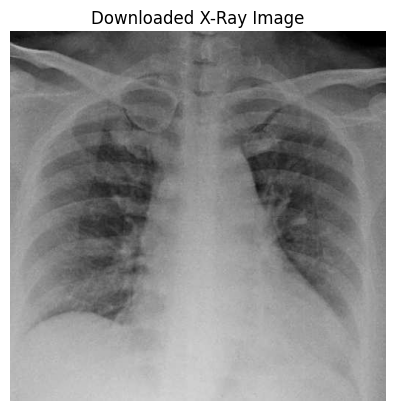

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'pneumonia_classifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 1. Download Image from Public URL
image_url = "https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/1-s2.0-S1684118220300608-main.pdf-002.jpg"
response = requests.get(image_url)

# Save the image locally if the download is successful
if response.status_code == 200:
    with open("downloaded_xray.jpg", "wb") as f:
        f.write(response.content)
    print("Image downloaded successfully.")
else:
    print("Failed to download the image.")
    exit()

# 2. Load and Preprocess the Image
img = cv2.imread("downloaded_xray.jpg")
img_resized = cv2.resize(img, (128, 128)) / 255.0  # Resize and normalize
img_input = np.expand_dims(img_resized, axis=0)  # Expand dimensions for prediction

# Display the downloaded image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Downloaded X-Ray Image")
plt.axis('off')
plt.show()

# 3. Load the Pre-trained Model
model = load_model('pneumonia_classifier.h5')

# 4. Make Prediction
prediction = model.predict(img_input)[0][0]
label = 'Pneumonia' if prediction > 0.5 else 'Normal'
print(f'Prediction: {label}')


In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Pneumonia vs Normal)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 2: Data Preparation
# Replace 'path_to_dataset' with your dataset path if available
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80-20 split

train_data = train_datagen.flow_from_directory(
    'path_to_dataset',  # Folder containing 'NORMAL' and 'PNEUMONIA' subdirectories
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'path_to_dataset',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Step 3: Train the Model
model.fit(train_data, validation_data=val_data, epochs=5, steps_per_epoch=len(train_data))

# Step 4: Save the Model
model.save('pneumonia_classifier.h5')
print("Model saved as pneumonia_classifier.h5")

# Step 5: Download an Image for Prediction
image_url = "https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/1-s2.0-S1684118220300608-main.pdf-002.jpg"
response = requests.get(image_url)

# Save the image if the download was successful
if response.status_code == 200:
    with open("downloaded_xray.jpg", "wb") as f:
        f.write(response.content)
    print("Image downloaded successfully.")
else:
    print("Failed to download the image.")
    exit()

# Step 6: Load and Preprocess the Downloaded Image
img = cv2.imread("downloaded_xray.jpg")
img_resized = cv2.resize(img, (128, 128)) / 255.0  # Resize and normalize
img_input = np.expand_dims(img_resized, axis=0)  # Expand dimensions for prediction

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Downloaded X-Ray Image")
plt.axis('off')
plt.show()

# Step 7: Load the Saved Model and Make Prediction
model = load_model('pneumonia_classifier.h5')
prediction = model.predict(img_input)[0][0]

# Step 8: Output the Prediction Result
label = 'Pneumonia' if prediction > 0.5 else 'Normal'
print(f'Prediction: {label}')



FileNotFoundError: [Errno 2] No such file or directory: 'path_to_dataset'

In [7]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import load_model
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 2: Create a directory to store the downloaded image
os.makedirs("xray_images", exist_ok=True)

# Step 3: Download a sample X-ray image from a public dataset
image_url = "https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/1-s2.0-S1684118220300608-main.pdf-002.jpg"
response = requests.get(image_url)

# Save the image locally in the 'xray_images' directory
image_path = "xray_images/sample_xray.jpg"
if response.status_code == 200:
    with open(image_path, "wb") as f:
        f.write(response.content)
    print(f"Image downloaded and saved at {image_path}")
else:
    print("Failed to download the image.")
    exit()

# Step 4: Preprocess the downloaded image
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (128, 128)) / 255.0  # Resize and normalize
img_input = np.expand_dims(img_resized, axis=0)  # Expand dimensions for batch input

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample X-Ray Image")
plt.axis('off')
plt.show()

# Step 5: Load a Pretrained Model (MobileNetV2) from TensorFlow Hub
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
                             tf.keras.layers.experimental.preprocessing.Resizing(224, 224),
                             tf.keras.layers.Lambda(lambda x: x / 255.0),
                             tf.keras.layers.experimental.preprocessing.Resizing(224, 224),


SyntaxError: incomplete input (<ipython-input-7-47f810617a49>, line 43)

Image downloaded and saved at xray_images/sample_xray.jpg


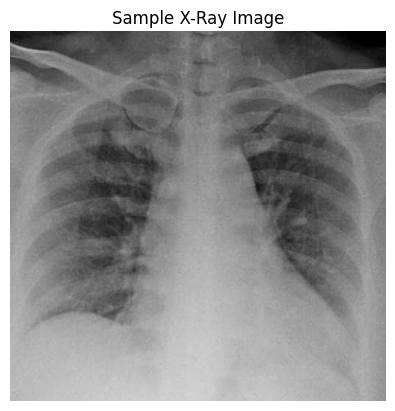

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7da933032c80> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [8]:
# Step 1: Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 2: Create a directory to store the downloaded image
os.makedirs("xray_images", exist_ok=True)

# Step 3: Download a sample X-ray image from a public dataset
image_url = "https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/1-s2.0-S1684118220300608-main.pdf-002.jpg"
response = requests.get(image_url)

# Save the image locally in the 'xray_images' directory
image_path = "xray_images/sample_xray.jpg"
if response.status_code == 200:
    with open(image_path, "wb") as f:
        f.write(response.content)
    print(f"Image downloaded and saved at {image_path}")
else:
    print("Failed to download the image.")
    exit()

# Step 4: Preprocess the downloaded image
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (224, 224)) / 255.0  # Resize and normalize
img_input = np.expand_dims(img_resized, axis=0)  # Expand dimensions for batch input

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample X-Ray Image")
plt.axis('off')
plt.show()

# Step 5: Load a Pretrained Model from TensorFlow Hub (MobileNetV2)
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"
model = tf.keras.Sequential([
    hub.KerasLayer(model_url, input_shape=(224, 224, 3))
])

# Step 6: Make a Prediction
predictions = model.predict(img_input)
predicted_class = np.argmax(predictions, axis=-1)

# Step 7: Display the Prediction Result
print(f"Predicted class: {predicted_class[0]}")


Image downloaded and saved at xray_images/sample_xray.jpg


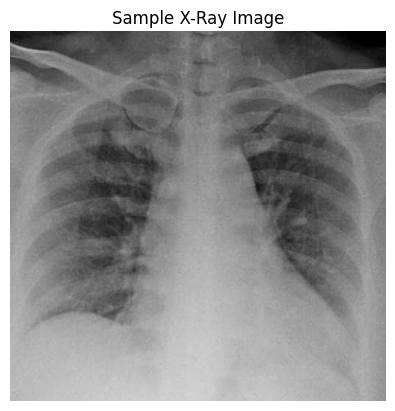

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7da935d0dba0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [9]:
# Step 1: Import necessary libraries
import tensorflow as tf
import tensorflow_hub as hub
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 2: Create a directory to store the downloaded image
os.makedirs("xray_images", exist_ok=True)

# Step 3: Download a sample X-ray image from a public dataset
image_url = "https://github.com/ieee8023/covid-chestxray-dataset/raw/master/images/1-s2.0-S1684118220300608-main.pdf-002.jpg"
response = requests.get(image_url)

# Save the image locally in the 'xray_images' directory
image_path = "xray_images/sample_xray.jpg"
if response.status_code == 200:
    with open(image_path, "wb") as f:
        f.write(response.content)
    print(f"Image downloaded and saved at {image_path}")
else:
    print("Failed to download the image.")
    exit()

# Step 4: Preprocess the downloaded image
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (224, 224)) / 255.0  # Resize and normalize
img_input = np.expand_dims(img_resized, axis=0)  # Expand dimensions for batch input

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Sample X-Ray Image")
plt.axis('off')
plt.show()

# Step 5: Load a Pretrained Model from TensorFlow Hub (MobileNetV2)
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"
model = tf.keras.Sequential([
    hub.KerasLayer(model_url, input_shape=(224, 224, 3), trainable=False)  # Set trainable to False
])

# Step 6: Make a Prediction
predictions = model.predict(img_input)
predicted_class = np.argmax(predictions, axis=-1)

# Step 7: Display the Prediction Result
print(f"Predicted class: {predicted_class[0]}")


In [10]:
from transformers import pipeline
import pdfplumber

# Load the summarization pipeline
summarizer = pipeline("summarization")

# Function to extract text from PDF and summarize it
def summarize_legal_document(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text()

    # Summarize the extracted text
    summary = summarizer(text, max_length=150, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# Example usage
pdf_file_path = "path/to/legal_document.pdf"
summary = summarize_legal_document(pdf_file_path)
print("Summary:", summary)


ModuleNotFoundError: No module named 'pdfplumber'

In [11]:
import spacy
import pdfplumber

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

# Function to extract named entities and key clauses
def extract_key_info(text):
    doc = nlp(text)

    # Extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Identify key clauses based on keywords (you can modify the keywords as needed)
    key_clauses = []
    for sent in doc.sents:
        if any(keyword in sent.text.lower() for keyword in ["termination", "confidentiality", "indemnity"]):
            key_clauses.append(sent.text)

    return entities, key_clauses

# Function to summarize text (simple extractive summarization)
def summarize_text(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    # Simple summarization: Take the first 3 sentences as a summary
    summary = " ".join(sentences[:3])
    return summary

# Main function
def process_legal_document(pdf_path):
    # Extract text from the PDF
    text = extract_text_from_pdf(pdf_path)

    # Extract key information
    entities, key_clauses = extract_key_info(text)

    # Summarize the text
    summary = summarize_text(text)

    return {
        "entities": entities,
        "key_clauses": key_clauses,
        "summary": summary
    }

# Example usage
pdf_file_path = "path/to/legal_document.pdf"
result = process_legal_document(pdf_file_path)

print("Named Entities:", result['entities'])
print("Key Clauses:", result['key_clauses'])
print("Summary:", result['summary'])


ModuleNotFoundError: No module named 'pdfplumber'

In [12]:
import spacy
from transformers import pipeline
import pdfplumber

# Load the SpaCy model and summarization pipeline from Hugging Face
nlp = spacy.load("en_core_web_sm")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

# Function to extract key clauses based on keywords
def extract_key_clauses(legal_text):
    doc = nlp(legal_text)
    key_clauses = [
        sent.text for sent in doc.sents
        if "agreement" in sent.text.lower() or "breach" in sent.text.lower()
    ]
    return key_clauses

# Function to summarize legal text using Hugging Face's pipeline
def summarize_legal_text(legal_text):
    summary = summarizer(legal_text, max_length=150, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# Main function to process a legal document
def process_legal_document(pdf_path):
    # Extract text from the PDF
    legal_text = extract_text_from_pdf(pdf_path)

    # Extract key clauses
    key_clauses = extract_key_clauses(legal_text)

    # Summarize the legal document
    summary = summarize_legal_text(legal_text)

    return {
        "key_clauses": key_clauses,
        "summary": summary
    }

# Example usage with inline text
legal_text = """
This Agreement is made effective as of the date of signature, by and between Party A and Party B.
Both parties agree to the terms outlined, including but not limited to confidentiality, non-disclosure,
and intellectual property clauses. In case of breach, the party in violation will be subject to legal action.
This Agreement is governed by the laws of the state.
"""

# Process inline legal text (instead of a PDF for demonstration)
key_clauses = extract_key_clauses(legal_text)
summary = summarize_legal_text(legal_text)

print("Key Clauses:", key_clauses)
print("Summary:", summary)


ModuleNotFoundError: No module named 'pdfplumber'

In [13]:
!pip install spacy transformers pdfplumber
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import spacy
from transformers import pipeline
import pdfplumber

# Load SpaCy's English model and the BART summarization pipeline
nlp = spacy.load("en_core_web_sm")
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

# Function to extract key clauses based on keywords
def extract_key_clauses(legal_text):
    doc = nlp(legal_text)
    key_clauses = [
        sent.text for sent in doc.sents
        if "agreement" in sent.text.lower() or "breach" in sent.text.lower()
    ]
    return key_clauses

# Function to summarize legal text
def summarize_legal_text(legal_text):
    summary = summarizer(legal_text, max_length=150, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# Main function to process legal text from a PDF or inline text
def process_legal_document(pdf_path=None, legal_text=None):
    if pdf_path:
        legal_text = extract_text_from_pdf(pdf_path)

    if not legal_text:
        raise ValueError("No legal text or PDF provided.")

    # Extract key clauses
    key_clauses = extract_key_clauses(legal_text)

    # Generate a summary
    summary = summarize_legal_text(legal_text)

    return {
        "key_clauses": key_clauses,
        "summary": summary
    }

# Example: Use uploaded PDF or inline text for testing
legal_text = """
This Agreement is made effective as of the date of signature, by and between Party A and Party B.
Both parties agree to the terms outlined, including but not limited to confidentiality, non-disclosure,
and intellectual property clauses. In case of breach, the party in violation will be subject to legal action.
This Agreement is governed by the laws of the state.
"""

# Process the document (choose one: uploaded PDF or inline text)
result = process_legal_document(legal_text=legal_text)  # Inline text example
# result = process_legal_document(pdf_path=pdf_path)  # If using uploaded PDF

# Display the results
print("Key Clauses:", result['key_clauses'])
print("Summary:", result['summary'])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Your max_length is set to 150, but your input_length is only 82. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)


Key Clauses: ['This Agreement is made effective as of the date of signature, by and between Party A and Party B.\nBoth parties agree to the terms outlined, including but not limited to confidentiality, non-disclosure, \nand intellectual property clauses.', 'In case of breach, the party in violation will be subject to legal action.\n', 'This Agreement is governed by the laws of the state.\n']
Summary: Both parties agree to the terms outlined, including but not limited to confidentiality, non-disclosure,  and intellectual property clauses. In case of breach, the party in violation will be subject to legal action.
